# CAPSTONE PROJECT FOR DATA SCIENCE


## PREDICTING THE SEVERITY OF A ROAD COLLISION BASED ON VARIOUS ATTRIBUTES, UTILIZING AN EXAMPLE DATA SET FOR SEATTLE CITY

## STEP 1: DATA COMPILATION

### - Importing various packages/modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

### - Importing the data file

In [2]:
# convert csv file to a pandas dataframe

df = pd.read_csv("/Users/kriti/Downloads/Ru/C9 - Capstone/Data-Collisions.csv", low_memory=False)

In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
# shape of the data frame

df.shape

(194673, 38)

## STEP 2: DATA PRE-PROCESSING

- Changing data format
- Removing/Adding unrequired/required columns
- Managing missing values
- Inspecting the target variable
- Balancing the data set

### - Data Formatting

In [5]:
#change date-time format

df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

df[["INCDATE","INCDTTM"]].head()

,INCDATE,INCDTTM
0,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00
1,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00
2,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00
3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00
4,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00


### - Removing Unnecessary Columns

In [6]:
#drop unrequired columns

df1 = df.drop(["X","Y","OBJECTID","INCKEY","COLDETKEY","REPORTNO","STATUS","INTKEY","LOCATION","EXCEPTRSNCODE",
               "EXCEPTRSNDESC","SEVERITYDESC","SDOT_COLCODE","SDOT_COLDESC","SDOTCOLNUM","SDOTCOLNUM","ST_COLCODE",
               "ST_COLDESC","SEGLANEKEY","CROSSWALKKEY"],axis=1)

In [7]:
# drop duplicate column

df1.drop("SEVERITYCODE.1", axis=1, inplace=True)

In [8]:
df1.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,1,Block,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,Block,Parked Car,4,0,0,3,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,N
3,1,Block,Other,3,0,0,3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,N
4,2,Intersection,Angles,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,N


In [9]:
# shape of the data frame

df1.shape

(194673, 18)

### - Managing Missing Values

In [10]:
# replace missing values with N for No
# replace 0 with N for No and 1 with Y for Yes

df1["INATTENTIONIND"].replace(np.nan,"N",inplace=True)
df1["UNDERINFL"].replace("0","N",inplace=True)
df1["UNDERINFL"].replace("1","Y",inplace=True)
df1["SPEEDING"].replace(np.nan,"N",inplace=True)
df1["PEDROWNOTGRNT"].replace(np.nan,"N",inplace=True)

df1.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),N,N,Overcast,Wet,Daylight,N,N,N
1,1,Block,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),N,N,Raining,Wet,Dark - Street Lights On,N,N,N
2,1,Block,Parked Car,4,0,0,3,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),N,N,Overcast,Dry,Daylight,N,N,N
3,1,Block,Other,3,0,0,3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),N,N,Clear,Dry,Daylight,N,N,N
4,2,Intersection,Angles,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At Intersection (intersection related),N,N,Raining,Wet,Daylight,N,N,N


In [11]:
#finding number of missing values in each column

missing_data = df1.isnull()

for column in missing_data.columns.values.tolist():
    print (column)
    print (missing_data[column].value_counts())
    print ("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDATE
False    194673
Name: INCDATE, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
False    194673
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
F

In [12]:
# replacing missing values with max value

df1["UNDERINFL"].replace(np.nan,"N",inplace=True)
df1.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),N,N,Overcast,Wet,Daylight,N,N,N
1,1,Block,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),N,N,Raining,Wet,Dark - Street Lights On,N,N,N
2,1,Block,Parked Car,4,0,0,3,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),N,N,Overcast,Dry,Daylight,N,N,N
3,1,Block,Other,3,0,0,3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),N,N,Clear,Dry,Daylight,N,N,N
4,2,Intersection,Angles,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At Intersection (intersection related),N,N,Raining,Wet,Daylight,N,N,N


In [13]:
#dropping the rows with missing values

df2 = df1.dropna(subset=["JUNCTIONTYPE","LIGHTCOND","ADDRTYPE","COLLISIONTYPE","WEATHER","ROADCOND"],axis=0)

In [14]:
#finding number of missing values in each column

missing_data2 = df2.isnull()

for column in missing_data2.columns.values.tolist():
    print (column)
    print (missing_data2[column].value_counts())
    print ("")

SEVERITYCODE
False    182895
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    182895
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    182895
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    182895
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    182895
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    182895
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    182895
Name: VEHCOUNT, dtype: int64

INCDATE
False    182895
Name: INCDATE, dtype: int64

INCDTTM
False    182895
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    182895
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
False    182895
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    182895
Name: UNDERINFL, dtype: int64

WEATHER
False    182895
Name: WEATHER, dtype: int64

ROADCOND
False    182895
Name: ROADCOND, dtype: int64

LIGHTCOND
False    182895
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
False    182895
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    182895
Name: SPEEDING, dtype: int64

HITPARK

In [15]:
# shape of the data frame

df2.shape

(182895, 18)

### - Inspecting the Target Variable (Severity Code)

,SEVERITYCODE
1,126270
2,56625


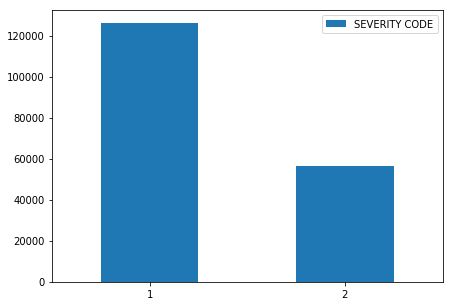

In [16]:
df2["SEVERITYCODE"].value_counts().plot(kind="bar", label="SEVERITY CODE", rot=0, legend=True, figsize=(7,5))

df2["SEVERITYCODE"].value_counts().to_frame()

### - Balancing the Data Set

In [17]:
#balancing the sample

from sklearn.utils import resample

majsc = df2[df2["SEVERITYCODE"]==1]
minsc = df2[df2["SEVERITYCODE"]==2]

bal_majsc = resample(majsc, replace = False, n_samples = 56625, random_state=123)

bal_df = pd.concat([bal_majsc, minsc])
bal_df["SEVERITYCODE"].value_counts().to_frame()

,SEVERITYCODE
2,56625
1,56625


In [18]:
bal_df.shape

(113250, 18)

## STEP 3: DATA VISUALIZATION & PROCESSING

- Determining the main controling factors of the severity of the collision
- Converting categorical variables into numerical values
- Selecting the features for further data analysis and model building
- Data normalization

Text(0.5, 0, 'Severity Code')

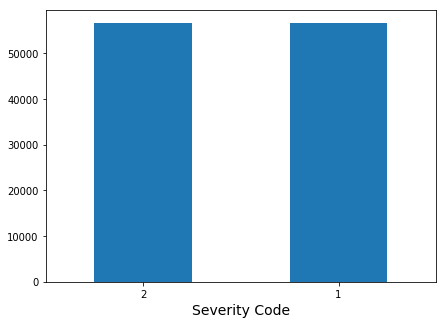

In [19]:
bal_df["SEVERITYCODE"].value_counts().plot(kind="bar", rot=0, figsize=(7,5))
plt.xlabel("Severity Code", size=14)

### - Effect of Different Attributes on the Severity of Collision

,INATTENTIONIND
N,94467
Y,18783


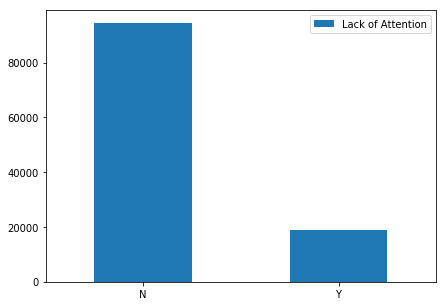

In [20]:
bal_df["INATTENTIONIND"].value_counts().plot(kind="bar", label="Lack of Attention", rot=0, legend=True, figsize=(7,5))

bal_df["INATTENTIONIND"].value_counts().to_frame()

,UNDERINFL
N,107290
Y,5960


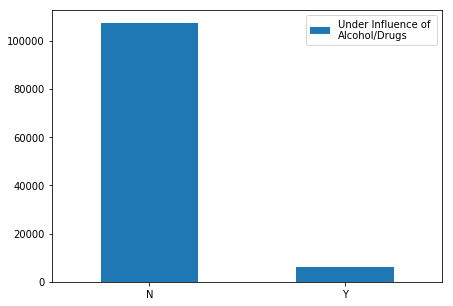

In [21]:
bal_df["UNDERINFL"].value_counts().plot(kind="bar", label="Under Influence of \nAlcohol/Drugs", rot=0, legend=True, 
                                     figsize=(7,5))

bal_df["UNDERINFL"].value_counts().to_frame()

,PEDROWNOTGRNT
N,108873
Y,4377


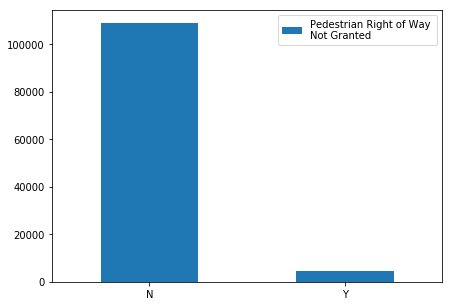

In [22]:
bal_df["PEDROWNOTGRNT"].value_counts().plot(kind="bar", label="Pedestrian Right of Way \nNot Granted", rot=0, 
                                         legend=True, figsize=(7,5))

bal_df["PEDROWNOTGRNT"].value_counts().to_frame()

,SPEEDING
N,107160
Y,6090


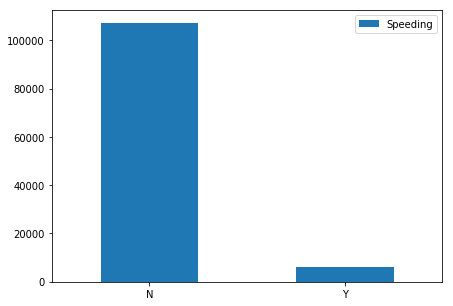

In [23]:
bal_df["SPEEDING"].value_counts().plot(kind="bar", label="Speeding", rot=0, legend=True, figsize=(7,5))

bal_df["SPEEDING"].value_counts().to_frame()

,HITPARKEDCAR
N,110518
Y,2732


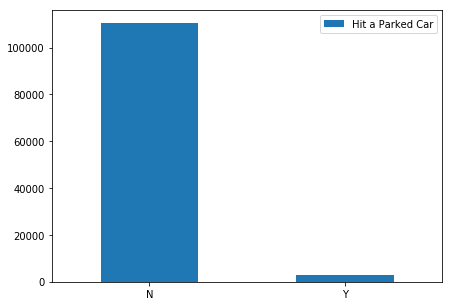

In [24]:
bal_df["HITPARKEDCAR"].value_counts().plot(kind="bar", label="Hit a Parked Car", rot=0, legend=True, figsize=(7,5))

bal_df["HITPARKEDCAR"].value_counts().to_frame()

In [25]:
#converting dates to day of the week

bal_df['Day of Week'] = bal_df['INCDATE'].dt.dayofweek

,Day of Week
4,18761
3,17194
2,16799
1,16554
5,15953
0,15323
6,12666


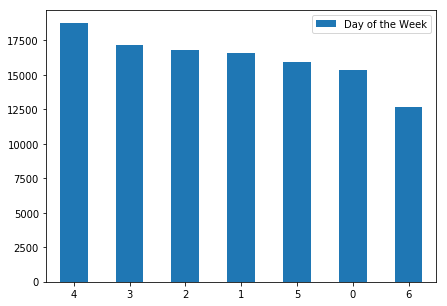

In [26]:
bal_df["Day of Week"].value_counts().plot(kind="bar", label="Day of the Week", rot=0, legend=True, figsize=(7,5))

bal_df["Day of Week"].value_counts().to_frame()

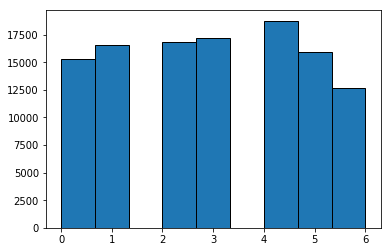

In [27]:
bins = np.linspace(0, 6, 10)
plt.hist(bal_df["Day of Week"], histtype="bar", bins=bins, edgecolor='black')
plt.show()

### - Converting Categorical Variables to Numerical Values

,ADDRTYPE
Block,69713
Intersection,43418
Alley,119


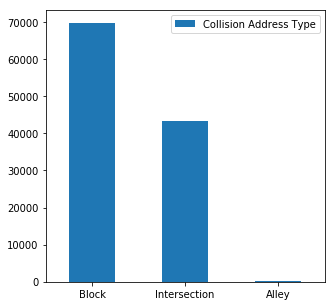

In [28]:
bal_df["ADDRTYPE"].value_counts().plot(kind="bar", label="Collision Address Type", rot=0, legend=True, figsize=(5,5))

bal_df["ADDRTYPE"].value_counts().to_frame()

In [29]:
bal_df['ADDRTYPE'].replace(to_replace=['Block','Intersection','Alley'], value=[0,1,2],inplace=True)
bal_df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,Day of Week
129091,1,0,Sideswipe,2,0,0,2,2014-05-17 00:00:00+00:00,2014-05-17 15:35:00,Mid-Block (not related to intersection),N,N,Clear,Dry,Daylight,N,N,N,5
175353,1,1,Left Turn,5,0,0,2,2018-03-11 00:00:00+00:00,2018-03-11 15:04:00,At Intersection (intersection related),N,N,Clear,Dry,Daylight,N,N,N,6
110094,1,0,Parked Car,2,0,0,2,2012-08-26 00:00:00+00:00,2012-08-26 03:55:00,Mid-Block (not related to intersection),N,N,Clear,Dry,Dark - Street Lights On,N,N,N,6
46167,1,1,Left Turn,5,0,0,2,2007-03-14 00:00:00+00:00,2007-03-14 18:00:00,At Intersection (intersection related),N,N,Clear,Dry,Daylight,N,N,N,2
38310,1,0,Parked Car,2,0,0,2,2006-10-19 00:00:00+00:00,2006-10-19 08:38:00,Mid-Block (but intersection related),N,N,Overcast,Wet,Daylight,N,N,N,3


,ROADCOND
Dry,76705
Wet,29555
Unknown,5570
Ice,681
Snow/Slush,522
Other,75
Standing Water,65
Sand/Mud/Dirt,44
Oil,33


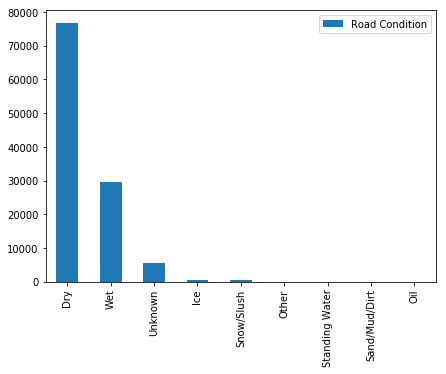

In [30]:
bal_df["ROADCOND"].value_counts().plot(kind="bar", label="Road Condition", legend=True, figsize=(7,5))

bal_df["ROADCOND"].value_counts().to_frame()

In [31]:
bal_df['ROADCOND'].replace(to_replace=['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt',
                                      'Oil'], value=[0,1,2,3,4,5,6,7,8], inplace=True)
bal_df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,Day of Week
129091,1,0,Sideswipe,2,0,0,2,2014-05-17 00:00:00+00:00,2014-05-17 15:35:00,Mid-Block (not related to intersection),N,N,Clear,0,Daylight,N,N,N,5
175353,1,1,Left Turn,5,0,0,2,2018-03-11 00:00:00+00:00,2018-03-11 15:04:00,At Intersection (intersection related),N,N,Clear,0,Daylight,N,N,N,6
110094,1,0,Parked Car,2,0,0,2,2012-08-26 00:00:00+00:00,2012-08-26 03:55:00,Mid-Block (not related to intersection),N,N,Clear,0,Dark - Street Lights On,N,N,N,6
46167,1,1,Left Turn,5,0,0,2,2007-03-14 00:00:00+00:00,2007-03-14 18:00:00,At Intersection (intersection related),N,N,Clear,0,Daylight,N,N,N,2
38310,1,0,Parked Car,2,0,0,2,2006-10-19 00:00:00+00:00,2006-10-19 08:38:00,Mid-Block (but intersection related),N,N,Overcast,1,Daylight,N,N,N,3


,LIGHTCOND
Daylight,72042
Dark - Street Lights On,29345
Unknown,5018
Dusk,3629
Dawn,1544
Dark - No Street Lights,830
Dark - Street Lights Off,708
Other,127
Dark - Unknown Lighting,7


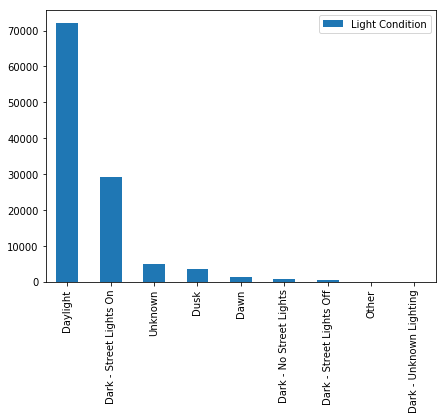

In [32]:
bal_df["LIGHTCOND"].value_counts().plot(kind="bar", label="Light Condition", legend=True, figsize=(7,5))

bal_df["LIGHTCOND"].value_counts().to_frame()

In [33]:
bal_df['LIGHTCOND'].replace(to_replace=['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights',
                                        'Dark - Street Lights Off','Other','Dark - Unknown Lighting'], 
                            value=[0,1,2,3,4,5,6,7,8], inplace=True)
bal_df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,Day of Week
129091,1,0,Sideswipe,2,0,0,2,2014-05-17 00:00:00+00:00,2014-05-17 15:35:00,Mid-Block (not related to intersection),N,N,Clear,0,0,N,N,N,5
175353,1,1,Left Turn,5,0,0,2,2018-03-11 00:00:00+00:00,2018-03-11 15:04:00,At Intersection (intersection related),N,N,Clear,0,0,N,N,N,6
110094,1,0,Parked Car,2,0,0,2,2012-08-26 00:00:00+00:00,2012-08-26 03:55:00,Mid-Block (not related to intersection),N,N,Clear,0,1,N,N,N,6
46167,1,1,Left Turn,5,0,0,2,2007-03-14 00:00:00+00:00,2007-03-14 18:00:00,At Intersection (intersection related),N,N,Clear,0,0,N,N,N,2
38310,1,0,Parked Car,2,0,0,2,2006-10-19 00:00:00+00:00,2006-10-19 08:38:00,Mid-Block (but intersection related),N,N,Overcast,1,0,N,N,N,3


,WEATHER
Clear,68535
Raining,20700
Overcast,17008
Unknown,5657
Snowing,475
Other,401
Fog/Smog/Smoke,361
Sleet/Hail/Freezing Rain,68
Blowing Sand/Dirt,28
Severe Crosswind,14


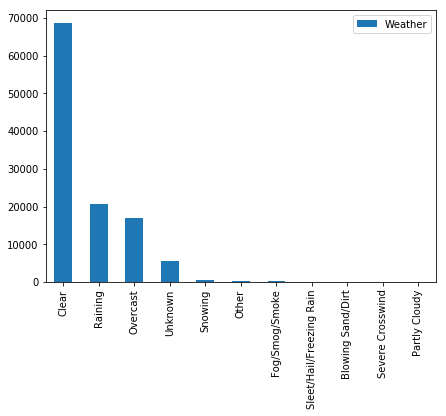

In [34]:
bal_df["WEATHER"].value_counts().plot(kind="bar", label="Weather", legend=True, figsize=(7,5))

bal_df["WEATHER"].value_counts().to_frame()

In [35]:
bal_df['WEATHER'].replace(to_replace=['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke',
                                        'Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind', 'Partly Cloudy'], 
                            value=[0,1,2,3,4,5,6,7,8,9,10], inplace=True)
bal_df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,Day of Week
129091,1,0,Sideswipe,2,0,0,2,2014-05-17 00:00:00+00:00,2014-05-17 15:35:00,Mid-Block (not related to intersection),N,N,0,0,0,N,N,N,5
175353,1,1,Left Turn,5,0,0,2,2018-03-11 00:00:00+00:00,2018-03-11 15:04:00,At Intersection (intersection related),N,N,0,0,0,N,N,N,6
110094,1,0,Parked Car,2,0,0,2,2012-08-26 00:00:00+00:00,2012-08-26 03:55:00,Mid-Block (not related to intersection),N,N,0,0,1,N,N,N,6
46167,1,1,Left Turn,5,0,0,2,2007-03-14 00:00:00+00:00,2007-03-14 18:00:00,At Intersection (intersection related),N,N,0,0,0,N,N,N,2
38310,1,0,Parked Car,2,0,0,2,2006-10-19 00:00:00+00:00,2006-10-19 08:38:00,Mid-Block (but intersection related),N,N,2,1,0,N,N,N,3


### - Selecting the Primary Features for Further Data Analysis and Model Building/Evaluation

In [36]:
#defining dependent variable

feat = bal_df[['ROADCOND','LIGHTCOND','WEATHER','ADDRTYPE']]
feat.head()

,ROADCOND,LIGHTCOND,WEATHER,ADDRTYPE
129091,0,0,0,0
175353,0,0,0,1
110094,0,1,0,0
46167,0,0,0,1
38310,1,0,2,0


In [37]:
feat.shape

(113250, 4)

In [38]:
#defining independent variable

Y = bal_df['SEVERITYCODE'].values
Y

array([1, 1, 1, ..., 2, 2, 2])

In [39]:
Y.shape

(113250,)

### - Normalizing Data

In [40]:
X = preprocessing.StandardScaler().fit(feat).transform(feat)
X[0:5]

/Users/kriti/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/kriti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-0.57976317, -0.56088911, -0.66811458, -0.78852984],
       [-0.57976317, -0.56088911, -0.66811458,  1.25703101],
       [-0.57976317,  0.40466171, -0.66811458, -0.78852984],
       [-0.57976317, -0.56088911, -0.66811458,  1.25703101],
       [ 0.84254862, -0.56088911,  1.25683458, -0.78852984]])

## STEP 4: DATA ANALYSIS USING DIFFERENT CLASSIFICATION ALGORITHMS

- Splitting the data set into train data and test data
- Building a model
- Checking the model accuarcy by altering its parameters
- Finding the best accuracy model
- Training the model using train data set
- Testing the model using test data set

## Classification Algoritms

- K-Nearest Neighbor (KNN)
- Decision Tree|
- Logistic Regression

## Accuracy Estimators

- Jaccard Index
- F1 - Score
- Log Loss

### - Splitting Data into Train and Test Set

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

print ('Train Dataset:', x_train.shape,  y_train.shape)
print ('Test Dataset:', x_test.shape,  y_test.shape)

Train Dataset: (84937, 4) (84937,)
Test Dataset: (28313, 4) (28313,)


## 1. K-Nearest Neighbor (KNN) Algorithm

In [42]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### - Checking Model Accuracy by Varying K

In [43]:
from sklearn.neighbors import KNeighborsClassifier

K = 16

j = np.zeros((K-1))
f = np.zeros((K-1))

#checking model accuracy using Jaccard Index and F1-score, by varying K from 1 to 15

for n in range(1, K): 
    KNN_trial = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=KNN_trial.predict(x_test)
    j[n-1] = jaccard_similarity_score(y_test, yhat)
    f[n-1] = f1_score(y_test, yhat, average='weighted')
    print ("The Jaccard Index for K = ", n, "is ", j[n-1])
    print ("The F1-score for K = ", n, "is ", f[n-1])
    print ("")

The Jaccard Index for K =  1 is  0.546780630805637
The F1-score for K =  1 is  0.5423071584956207

The Jaccard Index for K =  2 is  0.5587186098258751
The F1-score for K =  2 is  0.527352449528606

The Jaccard Index for K =  3 is  0.5499947020803164
The F1-score for K =  3 is  0.5453290052351532

The Jaccard Index for K =  4 is  0.560449263589164
The F1-score for K =  4 is  0.5308932032246838

The Jaccard Index for K =  5 is  0.560908416628404
The F1-score for K =  5 is  0.5353527550135816

The Jaccard Index for K =  6 is  0.560060749479038
The F1-score for K =  6 is  0.532351566810337

The Jaccard Index for K =  7 is  0.5612262918094162
The F1-score for K =  7 is  0.549139689888665

The Jaccard Index for K =  8 is  0.5578356232119521
The F1-score for K =  8 is  0.5329697335429536

The Jaccard Index for K =  9 is  0.5593896796524565
The F1-score for K =  9 is  0.5362601608688679

The Jaccard Index for K =  10 is  0.5134390562639071
The F1-score for K =  10 is  0.4193503407506718

The J

In [44]:
print ("The best value of Jaccard index is ", round(j.max(),3), "at K = ", np.where(j==j.max())[0]+1)
print ("The best value of F1-score is ", round(f.max(),3), "at K = ", np.where(f==f.max())[0]+1)

The best value of Jaccard index is  0.571 at K =  [12]
The best value of F1-score is  0.557 at K =  [13]


### - Best Accuracy Model ( K = 12 )

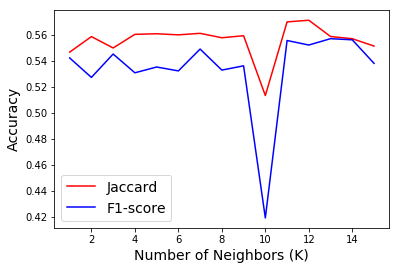

In [45]:
plt.plot(range(1, K), j, 'r', label='Jaccard')
plt.plot(range(1, K), f, 'b', label='F1-score')

plt.rcParams['figure.figsize'] = (9,6)

plt.ylabel('Accuracy', size=14)
plt.xlabel('Number of Neighbors (K)', size=14)
plt.legend(fontsize=14)

plt.show()

#### Corresponding to the maximum value of Jaccard index = 0.571, we choose K = 12

In [46]:
print ("The best accuracy of the KNN algorithm, considering Jaccard Index, is achieved at K =", np.where(j==j.max())[0]+1)

The best accuracy of the KNN algorithm, considering Jaccard Index, is achieved at K = [12]


### - Model Building, Training and Testing

In [47]:
#KNN algorithm using K=12

k = 12

KNN = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
yhat_1 = KNN.predict(x_test)
yhat_1[0:5],y_test[0:5]

(array([2, 1, 1, 1, 2]), array([2, 1, 1, 1, 1]))

## 2. Decision Tree

### - Checking Model Accuracy by Varying max_depth

In [48]:
from sklearn.tree import DecisionTreeClassifier

D = range(2, 7)

jd = np.zeros((5))
fd = np.zeros((5))

#checking model accuracy using Jaccard Index and F1-score, by varying d from 2 to 6

for d in D:
    tree_trial = DecisionTreeClassifier(criterion="entropy", max_depth=d)
    tree_trial.fit(x_train, y_train)
    yhat = tree_trial.predict(x_test)
    
    fd[d-2] = f1_score(y_test, yhat, average='weighted')
    jd[d-2] = jaccard_similarity_score(y_test, yhat)

    print ("The Jaccard Index for depth = ", d, "is ", jd[d-2])
    print ("The F1-score for depth = ", d, "is ", fd[d-2])
    print ("")

The Jaccard Index for depth =  2 is  0.5971108677992442
The F1-score for depth =  2 is  0.5905723143866104

The Jaccard Index for depth =  3 is  0.5970402288701303
The F1-score for depth =  3 is  0.5909311136341001

The Jaccard Index for depth =  4 is  0.5970402288701303
The F1-score for depth =  4 is  0.5909311136341001

The Jaccard Index for depth =  5 is  0.597605340303041
The F1-score for depth =  5 is  0.591625847489607

The Jaccard Index for depth =  6 is  0.5971108677992442
The F1-score for depth =  6 is  0.5910600185234134



In [49]:
print ("The best value of Jaccard index is ", round(jd.max(),3), "at d = ", np.where(jd==jd.max())[0]+2)
print ("The best value of F1-score is ", round(fd.max(),3), "at d = ", np.where(fd==fd.max())[0]+2)

The best value of Jaccard index is  0.598 at d =  [5]
The best value of F1-score is  0.592 at d =  [5]


### - Best Accuracy Model ( d = 6 )

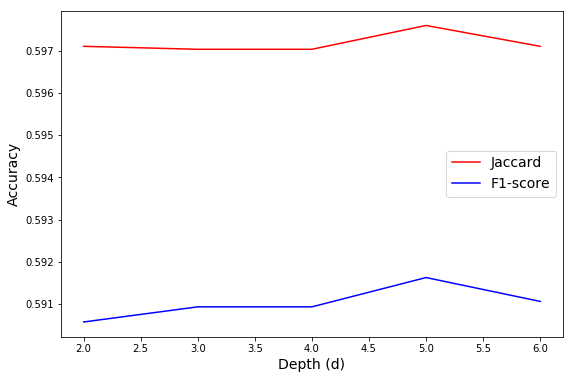

In [50]:
plt.plot(range(2, 7), jd, 'r', label='Jaccard')
plt.plot(range(2, 7), fd, 'b', label='F1-score')

plt.rcParams['figure.figsize'] = (9,6)

plt.ylabel('Accuracy', size=14)
plt.xlabel('Depth (d)', size=14)
plt.legend(fontsize=14)

plt.show()

#### Corresponding to the maximum value of Jaccard index = 0.598, we choose d = 5

In [51]:
print ("The best accuracy of the Decision tree, considering Jaccard Index, is achieved at d =", np.where(jd==jd.max())[0]+2)

The best accuracy of the Decision tree, considering Jaccard Index, is achieved at d = [5]


### - Model Building, Training and Testing

In [52]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
Tree.fit(x_train, y_train)
yhat_2 = Tree.predict(x_test)
yhat_2[0:5],y_test[0:5]

(array([2, 1, 1, 1, 2]), array([2, 1, 1, 1, 1]))

### - Tree Visualization

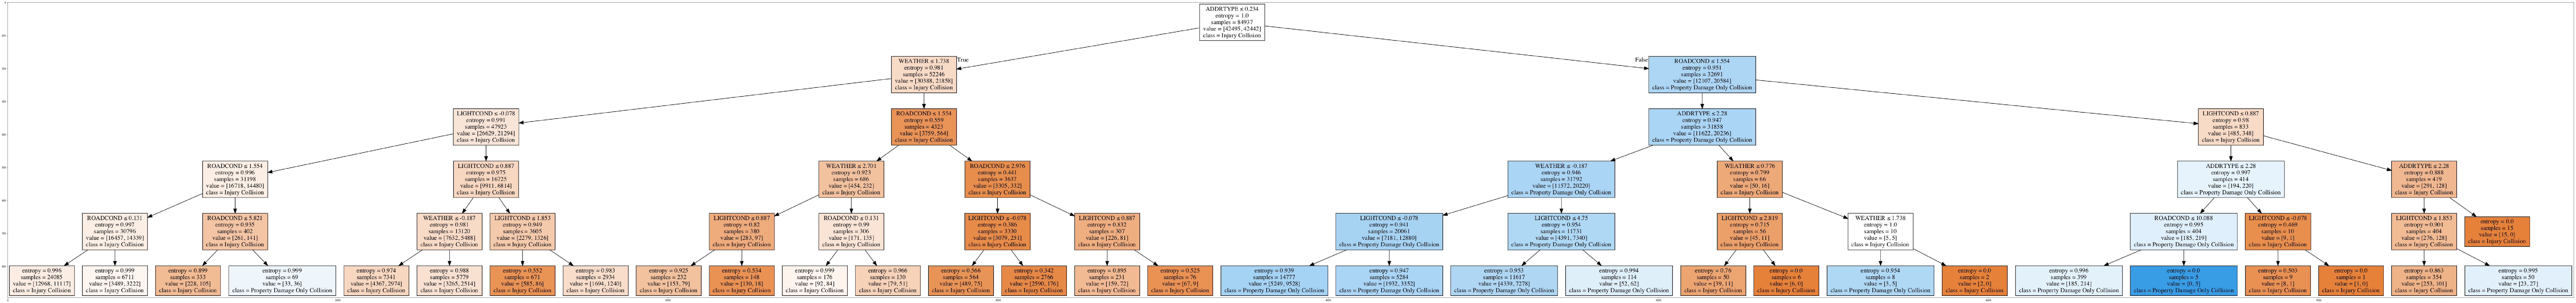

In [53]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

dot_data = StringIO()
filename = "Collision Tree.png"
featureNames = feat.columns[0:4]
targetNames = df["SEVERITYDESC"].unique().tolist()
out=tree.export_graphviz(Tree, feature_names=featureNames, out_file=dot_data, class_names= targetNames, filled=True, special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 200))
plt.imshow(img,interpolation='nearest')

## 3. Logistic Regression

### - Checking Model Accuracy by Varying C and Solver

In [56]:
from sklearn.linear_model import LogisticRegression

q=0

clist = [0.2, 0.01, 0.001]

solverlist = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

jl = np.zeros((3,5))

#checking model accuracy using Jaccard Index and F1-score, by varying C and solver

for c in clist:
    p=0
    for sol in solverlist:
        LR_trial = LogisticRegression(C=c, solver=sol).fit(x_train, y_train)
        yhat = LR_trial.predict(x_test)
        
        jl[q,p] = jaccard_similarity_score(y_test, yhat)
        
        print ("The Jaccard Index for c = ", c, "and solver as function ", sol, "is ", jl[q,p])
        #print (q,p,c,sol)
        print ("")
        
        p+=1
        
    q+=1

The Jaccard Index for c =  0.2 and solver as function  newton-cg is  0.5955921308232968

The Jaccard Index for c =  0.2 and solver as function  lbfgs is  0.5955921308232968

The Jaccard Index for c =  0.2 and solver as function  liblinear is  0.5955921308232968

The Jaccard Index for c =  0.2 and solver as function  sag is  0.5955921308232968

The Jaccard Index for c =  0.2 and solver as function  saga is  0.5955921308232968

The Jaccard Index for c =  0.01 and solver as function  newton-cg is  0.5955921308232968

The Jaccard Index for c =  0.01 and solver as function  lbfgs is  0.5955921308232968

The Jaccard Index for c =  0.01 and solver as function  liblinear is  0.5955921308232968

The Jaccard Index for c =  0.01 and solver as function  sag is  0.5955921308232968

The Jaccard Index for c =  0.01 and solver as function  saga is  0.5955921308232968

The Jaccard Index for c =  0.001 and solver as function  newton-cg is  0.5955568113587398

The Jaccard Index for c =  0.001 and solver 

In [57]:
print ("The best value of Jaccard index is ", round(jl.max(),5), "at", np.where(jl == jl.max()))

The best value of Jaccard index is  0.59563 at (array([2]), array([3]))


### - Best Accuracy Model ( C = 0.001 and solver = 'sag' )

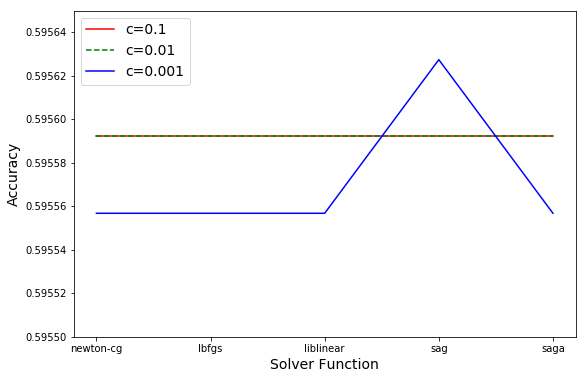

In [58]:
plt.plot(solverlist, jl[0], 'r', label='c=0.1')
plt.plot(solverlist, jl[1], 'g', label='c=0.01', linestyle = '--')
plt.plot(solverlist, jl[2], 'b', label='c=0.001')

plt.rcParams['figure.figsize'] = (9,6)
plt.ylim(0.5955,0.59565)
plt.xlabel("Solver Function", size=14)
plt.ylabel("Accuracy",size=14)
plt.legend(loc='upper left', fontsize=14)
plt.show()

#### Corresponding to the maximum value of Jaccard index = 0.596, we choose C = 0.001 and solver = 'sag'

In [59]:
print ("The best value of Jaccard index is ", round(jl.max(),3), "at c at ", np.where(jl==jl.max())[0], "and solver function",
      np.where(jl==jl.max())[1])

The best value of Jaccard index is  0.596 at c at  [2] and solver function [3]


### - Model Building, Training and Testing

In [60]:
LR = LogisticRegression(C = 0.001, solver = 'sag').fit(x_train, y_train)
yhat_4 = LR.predict(x_test)
prob = LR.predict_proba(x_test)

yhat_4[0:5], y_test[0:5]

(array([2, 1, 1, 1, 2]), array([2, 1, 1, 1, 1]))

### - Accuracy of the Model

In [61]:
fl = f1_score(y_test, yhat_4, average='weighted')
ll = log_loss(y_test, prob)

print ("F1-score = ", fl)
print ("Log Loss = ", ll)

F1-score =  0.5889107579486615
Log Loss =  0.6682305817915167


## STEP 5:  ACCURACY REPORT

In [62]:
result = pd.DataFrame({"Algorithm": ("KNN", "Decision Tree", " Logistic Regression"), "Jaccard": (j.max(), jd.max(), jl.max()), 
                       "F1-score": (f.max(), fd.max(), fl), "Log Loss": ("NA", "NA", ll)})

result = result.style.hide_index()
result

Algorithm,Jaccard,F1-score,Log Loss
KNN,0.571292,0.557127,NA
Decision Tree,0.597605,0.591626,NA
Logistic Regression,0.595627,0.588911,0.668231
